# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import dependencies and setup for the script
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
# import citipy for based on latitude and longitude
from citipy import citipy
import datetime
today = datetime.date.today()

# Import the API Keys Google and OpenWeather (blocked w/ gitignore)
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Use these ranges of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [2]:
# Make the lists for holding the latitude and longitudes per cities
lat_longs = []
cities = []

# To create a list of random cities with lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_longs = zip(lats, longs)

# Find and identify nearest city for each latitude, longitude combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# CHECKPOINT: Print the city count to confirm sufficient count
print(f'There is {len(cities)} cities in the list.')
print(f'It will take {round(len(cities)/60, 2)} minutes to connect to the servers in each city.')

There is 616 cities in the list.
It will take 10.27 minutes to connect to the servers in each city.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get the number of sets needed in the for loop
total_set_number = (len(cities) // 50) + 1

# Set up the lists which will be used to create dataframe
date = []
city = []
country = []
max_temp = []
humidity = []
lat = []
lon = []
cloudiness = []
wind_speed = []

#Add a failed counter
failed_counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=imperial&q="
# url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=Imperial&APPID="
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Gather weather information for each city
print('Getting data from site...')
print('------------------------------------------------')

# 
for set_counter in range(total_set_number):
    
    # Use try and except block: prevents the code from stopping when the set does not have 50 records
    try:    
        
        # For each record, OpenWeather API will pull the information and append to corresponding lists
        for record_counter in range(50):
            
            # Apply a counter to show the actual index the city is in the cities list 
            counter = set_counter * 50 + record_counter
            
            # CHECKPOINT
            # Print the current set and record index
            print(f'Processing Record {record_counter + 1} of Set {set_counter + 1} | {cities[counter]}')

            # Use try and except block: prevents the code from stopping when a city cannot be found
            try:
                
                # Get the query url and make a call
                query_url = url + cities[counter]
                weather_json = requests.get(query_url, time.sleep(1)).json()
                
             
                # Append to lists
                date.append(weather_json["dt"])
                city.append(cities[counter])
                country.append(weather_json["sys"]["country"])
                max_temp.append(weather_json["main"]["temp_max"])
                humidity.append(weather_json["main"]["humidity"])
                lat.append(weather_json["coord"]["lat"])
                lon.append(weather_json["coord"]["lon"])             
                cloudiness.append(weather_json["clouds"]["all"])
                wind_speed.append(weather_json["wind"]["speed"])
                              
                         
            # If the city is not found, print it out, and increment to the failed counter
            except KeyError:

                print('Oops!! The city not found. Skipping it...')
                failed_counter += 1
            
            # (For testing)If any other error, print it out
            except:
                
                print('Oh no! Unexpected Error')
    
    # Break out from the loop once the IndexError was found
    except IndexError:
        
        break
        
# Print out the number of cities found and not found
print('-----------------------------')
print(f'There are {failed_counter} cities not found. {len(cities) - failed_counter} cities in dataframe.')
print('The data has processed, complete.')      
print('-----------------------------')

Getting data from site...
------------------------------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | kamenskoye
Oops!! The city not found. Skipping it...
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | agua de dios
Processing Record 7 of Set 1 | neiafu
Processing Record 8 of Set 1 | cockburn town
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | taolanaro
Oops!! The city not found. Skipping it...
Processing Record 12 of Set 1 | oistins
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | son la
Processing Record 15 of Set 1 | atambua
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | nioro
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | progreso
Processing Record 21

Processing Record 35 of Set 4 | alofi
Processing Record 36 of Set 4 | matara
Processing Record 37 of Set 4 | nisia floresta
Processing Record 38 of Set 4 | camocim
Processing Record 39 of Set 4 | meulaboh
Processing Record 40 of Set 4 | loncoche
Processing Record 41 of Set 4 | turkmenabat
Processing Record 42 of Set 4 | sturgeon bay
Processing Record 43 of Set 4 | bhavnagar
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | noumea
Processing Record 46 of Set 4 | leningradskiy
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | felipe carrillo puerto
Processing Record 49 of Set 4 | tarakan
Processing Record 50 of Set 4 | murashi
Processing Record 1 of Set 5 | kralendijk
Processing Record 2 of Set 5 | baykit
Processing Record 3 of Set 5 | mwense
Processing Record 4 of Set 5 | evanston
Processing Record 5 of Set 5 | guadalupe y calvo
Processing Record 6 of Set 5 | sinnamary
Processing Record 7 of Set 5 | adrar
Processing Record 8 of Set 5 | naze
Pr

Processing Record 20 of Set 8 | warrnambool
Processing Record 21 of Set 8 | greenfield
Processing Record 22 of Set 8 | changli
Processing Record 23 of Set 8 | zhigalovo
Processing Record 24 of Set 8 | quesnel
Processing Record 25 of Set 8 | porkhov
Processing Record 26 of Set 8 | olga
Processing Record 27 of Set 8 | phrai bung
Oops!! The city not found. Skipping it...
Processing Record 28 of Set 8 | berlevag
Processing Record 29 of Set 8 | colares
Processing Record 30 of Set 8 | bobrovytsya
Processing Record 31 of Set 8 | moa
Processing Record 32 of Set 8 | barcelos
Processing Record 33 of Set 8 | san felipe
Processing Record 34 of Set 8 | korfovskiy
Processing Record 35 of Set 8 | wuwei
Processing Record 36 of Set 8 | imeni poliny osipenko
Processing Record 37 of Set 8 | nome
Processing Record 38 of Set 8 | karaidel
Processing Record 39 of Set 8 | cidreira
Processing Record 40 of Set 8 | codrington
Processing Record 41 of Set 8 | lebu
Processing Record 42 of Set 8 | margate
Processing

Processing Record 3 of Set 12 | teknaf
Processing Record 4 of Set 12 | bukachacha
Processing Record 5 of Set 12 | ronne
Processing Record 6 of Set 12 | matay
Processing Record 7 of Set 12 | gua musang
Processing Record 8 of Set 12 | bontang
Processing Record 9 of Set 12 | buin
Processing Record 10 of Set 12 | uglegorsk
Processing Record 11 of Set 12 | kinshasa
Processing Record 12 of Set 12 | pisco
Processing Record 13 of Set 12 | diu
Processing Record 14 of Set 12 | mackenzie
Processing Record 15 of Set 12 | melita
Processing Record 16 of Set 12 | minsk
Processing Record 17 of Set 12 | ambon
Processing Record 18 of Set 12 | villazon
Processing Record 19 of Set 12 | alta gracia
Processing Record 20 of Set 12 | necochea
Processing Record 21 of Set 12 | boundiali
Processing Record 22 of Set 12 | bhatkal
Processing Record 23 of Set 12 | ostersund
Processing Record 24 of Set 12 | jumla
Processing Record 25 of Set 12 | dunedin
Processing Record 26 of Set 12 | sibolga
Processing Record 27 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a DataFrame with the city information for below paramaters
city_dict = {'City': city,
             'Latitude': lat,
             'Longitude': lon,
             'Max Temperature': max_temp,
             'Humidity (%)': humidity,
             'Cloudiness (%)': cloudiness,
             'Wind Speed (MPH)': wind_speed,
             'Country': country,
             'Date': date
            }
city_df = pd.DataFrame(city_dict)

# Import the DataFrame into the CSV file
csv_path = '../output_data/cities.csv'
city_df.to_csv(csv_path)

# Display DataFrame
city_df

,City,Latitude,Longitude,Max Temperature,Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,albany,42.6001,-73.9662,77.58,57,55,6.82,US,1627078986
1,bredasdorp,-34.5322,20.0403,49.32,76,0,10.36,ZA,1627078907
2,port alfred,-33.5906,26.8910,53.26,66,100,4.43,ZA,1627078919
3,ushuaia,-54.8000,-68.3000,37.06,81,40,9.22,AR,1627078762
4,agua de dios,4.3765,-74.6700,87.82,59,99,5.37,CO,1627078993
...,...,...,...,...,...,...,...,...,...
566,katobu,-4.9408,122.5276,73.63,88,84,3.24,ID,1627079750
567,madaoua,14.0730,5.9600,81.59,66,62,13.98,NE,1627079751
568,trat,12.5000,102.5000,76.01,95,100,6.38,TH,1627079752
569,udachnyy,66.4167,112.4000,62.01,77,39,15.43,RU,1627079610


In [7]:
# Provide statistical analysis on the DataFrame
city_df.describe()

,Latitude,Longitude,Max Temperature,Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,20.917484,15.304256,70.185359,71.497373,52.914186,8.269632,1.627079e+09
std,32.628689,90.268919,14.375559,19.184092,37.981593,6.013416,2.374475e+02
min,-54.800000,-179.166700,33.080000,9.000000,0.000000,0.000000,1.627079e+09
25%,-5.592500,-67.753600,59.420000,63.000000,14.000000,3.850000,1.627079e+09
50%,22.285500,18.423200,73.000000,76.000000,59.000000,6.910000,1.627079e+09
75%,49.008100,95.472600,80.720000,85.000000,90.000000,11.375000,1.627080e+09
max,78.218600,179.316700,106.250000,100.000000,100.000000,35.280000,1.627080e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Drop the rows of data that have a humidity higher than 100%
cleaned_cities_df = city_df.loc[city_df['Humidity (%)'] <= 100]
cleaned_cities_df

,City,Latitude,Longitude,Max Temperature,Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,albany,42.6001,-73.9662,77.58,57,55,6.82,US,1627078986
1,bredasdorp,-34.5322,20.0403,49.32,76,0,10.36,ZA,1627078907
2,port alfred,-33.5906,26.8910,53.26,66,100,4.43,ZA,1627078919
3,ushuaia,-54.8000,-68.3000,37.06,81,40,9.22,AR,1627078762
4,agua de dios,4.3765,-74.6700,87.82,59,99,5.37,CO,1627078993
...,...,...,...,...,...,...,...,...,...
566,katobu,-4.9408,122.5276,73.63,88,84,3.24,ID,1627079750
567,madaoua,14.0730,5.9600,81.59,66,62,13.98,NE,1627079751
568,trat,12.5000,102.5000,76.01,95,100,6.38,TH,1627079752
569,udachnyy,66.4167,112.4000,62.01,77,39,15.43,RU,1627079610


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The graph below provides a visual view of the the relationship between global latitude and temperature of each city within the data provided. The plot graphic shows how the data of the city temperatures rise as latitude approaches 0 from -60(ish) degrees latitude, but appear to decrease more steeply as they increase from 0. 

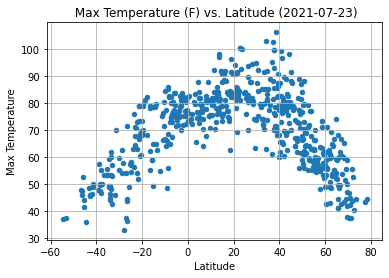

In [9]:
# Scatter Plot: Latitude and Max Temperature 
# Include Title and Date
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature', 
                       title=f' Max Temperature (F) vs. Latitude ({today})')
plt.grid()
plt.savefig('../output_data/Latitude_MaxTemperature_Plot.png')

## Latitude vs. Humidity Plot
This graph provides a view of the cities humidity between 60 and 80 degrees latitude.  Humidity is above 60% with little striking increase or decrease as latitude changes. 

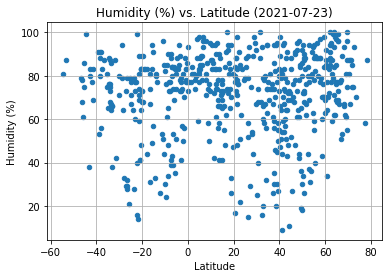

In [10]:
# Scatter PLot: Latitude and Humidity
# Include the date in title
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', 
                       title=f'Humidity (%) vs. Latitude ({today})')
plt.grid()
plt.savefig('../output_data/Latitude_Humidity_Plot.png')

## Latitude vs. Cloudiness Plot
The graph shows cities that are close togehter with and without cloud coverage.  Latitue appears evenly distributed. No strong coorliation between the two measurements.  

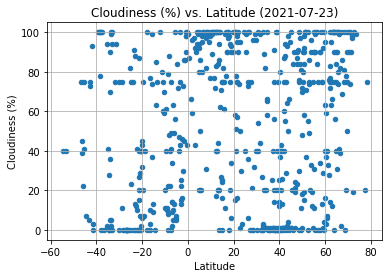

In [11]:
# Scatter Plot Latitude and Cloudiness
# Include the date in title 
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', 
                       title=f'Cloudiness (%) vs. Latitude ({today})')
plt.grid()
plt.savefig('../output_data/Latitude_Cloudiness_Plot.png')

## Latitude vs. Wind Speed Plot
The plot shows almost equal parts wind speed across the graphy with a slight increase around 37 to 70 degreese.  

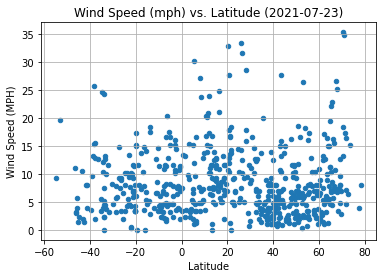

In [12]:
# Scatter Plot Latitude and Wind Speed
# Include the date in title 
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', 
                       title=f'Wind Speed (mph) vs. Latitude ({today})')
plt.grid()
plt.savefig('../output_data/Latitude_WindSpeed_Plot.png')

## Linear Regression

In [13]:
# Create two DataFrame's determined by the latitude
north_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] >= 0]
south_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.467501793979363
The linear regression model is y = -0.48x + 90.93


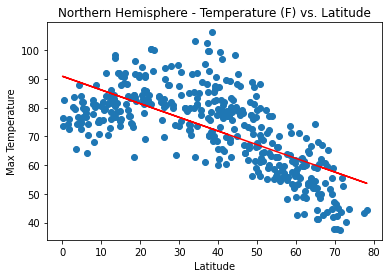

In [14]:
# Linear Regression Plot:  Latitude and Max temperature in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature', title='Northern Hemisphere - Temperature (F) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Max Temperature'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Max Temperature'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (45, 30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
Let's face it, it dang hot in the south!  The graph shows that as the latitude decreaases the tempatures rise.  

The r-squared is 0.6583842975371601
The linear regression model is y = 0.8x + 80.81


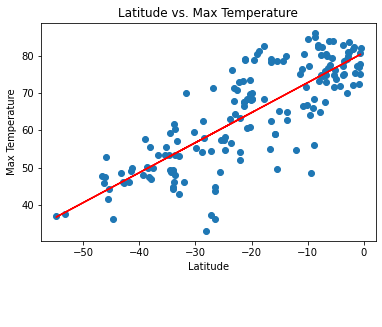

In [15]:
# Linear Regression Plot:  Latitude and Max Temperature in the Southern Hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature', title='Latitude vs. Max Temperature')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Max Temperature'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Max Temperature'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The city temperature does increase as latitude approaches 0 and decreases as it increases from 0 degrees. The south has a positive correlation.  If you head towards the equator will rise city tempatures.  

The r-squared is 3.6496814051437144e-05
The linear regression model is y = 0.01x + 72.34


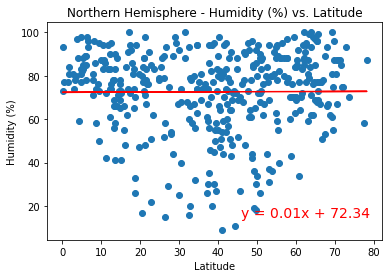

In [16]:
# Linear Regression Plot: Latitude and Humidity in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Northern Hemisphere - Humidity (%) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Much like the overall data, we can see that there are clusters of cities at 0%, 40%, 75%, and 100% cloudiness. The distribution of cities across latitudes appears fairly even at each of those points, but once again we see that a higher quantity of cities closer to a latitude of 0 may be impacting the correlation. At 0.06, there is essentially no correlation, which means that southern latitude is not a good predictor of cloudiness of a given city.

The r-squared is 0.003959184005341373
The linear regression model is y = -0.09x + 67.21


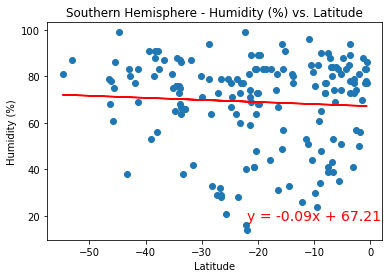

In [17]:
# Linear Regression Plot: Latitude and Humidity in the Southern Hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Southern Hemisphere - Humidity (%) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,18),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.008058189803514873
The linear regression model is y = -0.17x + 64.3


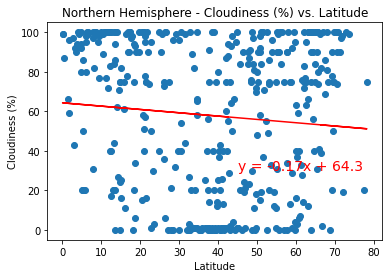

In [18]:
# Linear Regression Plot: Latitude and Cloudiness in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Northern Hemisphere - Cloudiness (%) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0002934679265152792
The linear regression model is y = 0.05x + 42.32


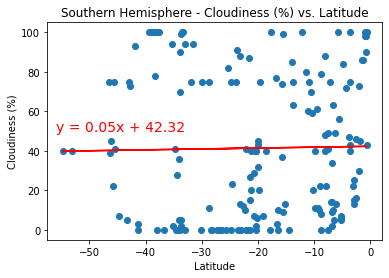

In [19]:
# Linear Regression Plot: Latitude and Cloudiness in the Southern Hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Southern Hemisphere - Cloudiness (%) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-56,50),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
This scatter plot is not a good predictor of cloudiness.

The r-squared is 0.007310086983543323
The linear regression model is y = -0.03x + 9.47


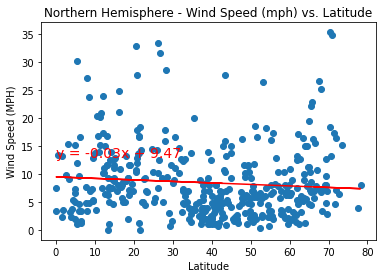

In [20]:
# Linear Regression Plot: Latitude and Wind Speed in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Northern Hemisphere - Wind Speed (mph) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
There does not appear to be a strong relationship between the two data points provided, city latitude and wind speed. 

The r-squared is 1.3710785223835456e-05
The linear regression model is y = -0.0x + 7.87


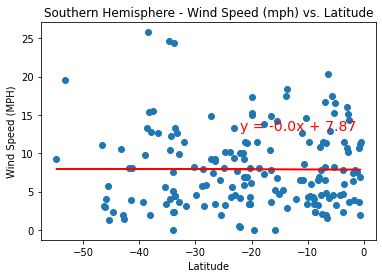

In [21]:
# Linear Regression Plot: Latitude and Wind Speed in the Southern Hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Southern Hemisphere - Wind Speed (mph) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')